# 003 读取数据

In [1]:
# Import packages
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
import matplotlib.pyplot as plt
import time
%matplotlib inline


## 读取数据集

### 读取Fashion-MNIST数据集

In [2]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root='../data',
    train=True,
    transform=trans,
    download=True
)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data",
    train=False,
    transform=trans,
    download=True
)

len(mnist_train), len(mnist_test)


F:\miniconda\envs\mlbook\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


(60000, 10000)

### 查看数据的Shape

In [3]:
mnist_train[0][0].shape


torch.Size([1, 28, 28])

### 定义数据集的Label

> https://github.com/zalandoresearch/fashion-mnist#labels

In [4]:
def get_labels(labels):
    text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
                   'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    return [text_labels[int(i)] for i in labels]


### 查看样本图片

In [5]:
def show_image(imgs, rows, cols, titles=None, scale=2):
    figsize = (cols*scale, rows*scale)
    _, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes


array([<AxesSubplot:title={'center':'Ankle boot'}>,
       <AxesSubplot:title={'center':'T-shirt/top'}>,
       <AxesSubplot:title={'center':'T-shirt/top'}>,
       <AxesSubplot:title={'center':'Dress'}>,
       <AxesSubplot:title={'center':'T-shirt/top'}>,
       <AxesSubplot:title={'center':'Pullover'}>,
       <AxesSubplot:title={'center':'Sneaker'}>,
       <AxesSubplot:title={'center':'Pullover'}>,
       <AxesSubplot:title={'center':'Sandal'}>,
       <AxesSubplot:title={'center':'Sandal'}>,
       <AxesSubplot:title={'center':'T-shirt/top'}>,
       <AxesSubplot:title={'center':'Ankle boot'}>,
       <AxesSubplot:title={'center':'Sandal'}>,
       <AxesSubplot:title={'center':'Sandal'}>,
       <AxesSubplot:title={'center':'Sneaker'}>,
       <AxesSubplot:title={'center':'Ankle boot'}>,
       <AxesSubplot:title={'center':'Trouser'}>,
       <AxesSubplot:title={'center':'T-shirt/top'}>], dtype=object)

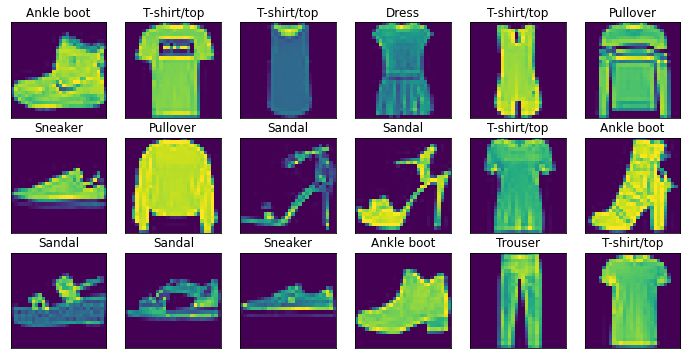

In [6]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))

show_image(X.reshape(18, 28, 28), 3, 6, titles=get_labels(y))


## 读取批量大小的数据

In [7]:
batch_size = 256
dataloader_workers = 4

train_iter = data.DataLoader(
    mnist_train,
    batch_size,
    shuffle=True,
    num_workers=dataloader_workers
)

timer = time.time()
for X, y in train_iter:
    continue

f'cost: {time.time()-timer} seconds'


'cost: 3.9363598823547363 seconds'

## 将读取数据封装为函数


In [9]:
def load_data_fashion_mnist(batch_size, resize=None, workers=4):
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data",
        train=True,
        transform=trans,
        download=True
    )
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data",
        train=False,
        transform=trans, download=True
    )
    return (
        data.DataLoader(
            mnist_train,
            batch_size,
            shuffle=True,
            num_workers=workers
        ),
        data.DataLoader(
            mnist_test,
            batch_size,
            shuffle=False,
            num_workers=workers
        )
    )


train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break


torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64
